# LoL Analysis
Data taken from kaggle: https://www.kaggle.com/datasets/nathansmallcalder/lol-match-history-and-summoner-data-80k-matches?select=RankTbl.csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

# Set seaborn style for consistent formatting
sns.set_style("whitegrid")
sns.set_palette("husl")

### Extract all csv into pd df

In [3]:
data_dir = "data"
all_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
data_frames = {}
for file in all_files:
    df_name = os.path.splitext(file)[0]
    data_frames[df_name] = pd.read_csv(os.path.join(data_dir, file))
    print(f"Loaded {file} into DataFrame '{df_name}' with shape {data_frames[df_name].shape}")

Loaded ChampionTbl.csv into DataFrame 'ChampionTbl' with shape (172, 2)
Loaded ItemTbl.csv into DataFrame 'ItemTbl' with shape (635, 2)
Loaded MatchStatsTbl.csv into DataFrame 'MatchStatsTbl' with shape (78863, 31)
Loaded MatchTbl.csv into DataFrame 'MatchTbl' with shape (35421, 5)
Loaded RankTbl.csv into DataFrame 'RankTbl' with shape (11, 2)
Loaded SummonerMatchTbl.csv into DataFrame 'SummonerMatchTbl' with shape (78863, 4)
Loaded TeamMatchTbl.csv into DataFrame 'TeamMatchTbl' with shape (35045, 24)


In [4]:
# Function to get DataFrame by name from dictionary of dfs
def get_dataframe(data, name):
    df =  data.get(name)
    if df is not None:
        return df
    else:
        raise ValueError(f"DataFrame '{name}' not found.")

## Exploratory Data Analysis (EDA)

Let's explore the League of Legends match data to understand patterns, distributions, and relationships.

### 1. Dataset Overview
First, let's examine the structure and basic information about each dataset.

In [5]:
# Display basic information about all datasets
for name, df in data_frames.items():
    print(f"\n{'='*60}")
    print(f"Dataset: {name}")
    print(f"{'='*60}")
    print(f"Shape: {df.shape} (rows, columns)")
    print(f"\nColumn Names and Types:")
    print(df.dtypes)
    print(f"\nMissing Values:")
    print(df.isnull().sum())
    print(f"\nFirst row:")
    print(df.head(1))


Dataset: ChampionTbl
Shape: (172, 2) (rows, columns)

Column Names and Types:
ChampionId       int64
ChampionName    object
dtype: object

Missing Values:
ChampionId      0
ChampionName    0
dtype: int64

First row:
   ChampionId ChampionName
0           0  No Champion

Dataset: ItemTbl
Shape: (635, 2) (rows, columns)

Column Names and Types:
ItemID       int64
ItemName    object
dtype: object

Missing Values:
ItemID      0
ItemName    0
dtype: int64

First row:
   ItemID ItemName
0    1001    Boots

Dataset: MatchStatsTbl
Shape: (78863, 31) (rows, columns)

Column Names and Types:
MatchStatsId             int64
SummonerMatchFk          int64
MinionsKilled            int64
DmgDealt                 int64
DmgTaken                 int64
TurretDmgDealt           int64
TotalGold                int64
Lane                    object
Win                      int64
item1                    int64
item2                    int64
item3                    int64
item4                    int64
item5  

### 2. Match Statistics Analysis - with CoPilot
Let's analyze the match statistics to understand game outcomes and performance metrics.

The median and mean game duration is 1597.00 and 1593.75 respectively


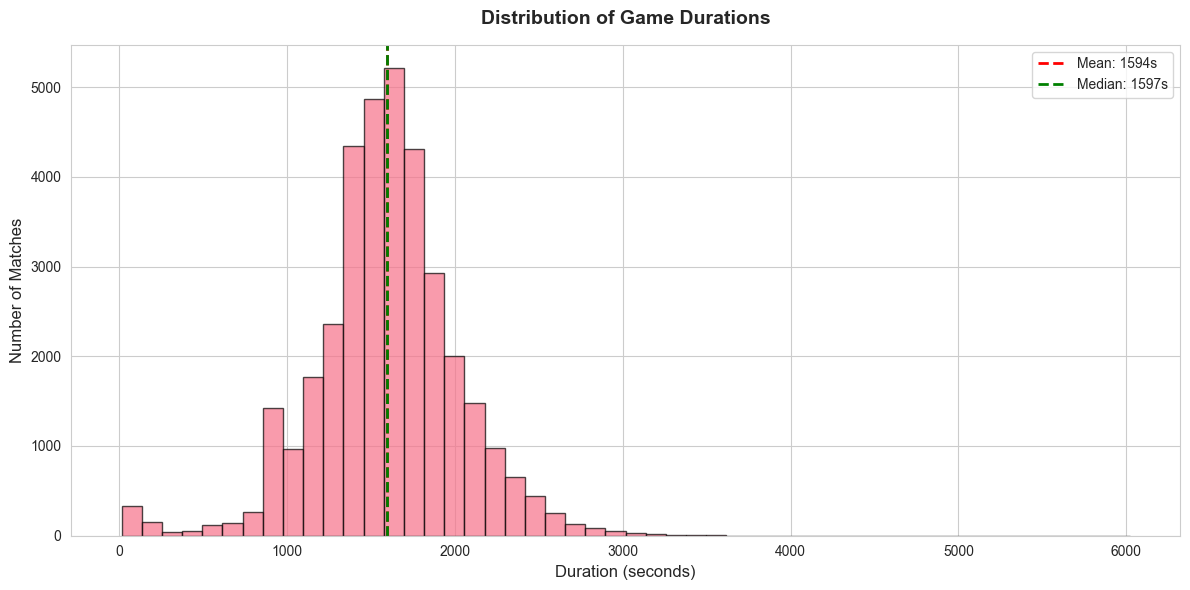

In [6]:
matchsdf = get_dataframe(data_frames, 'MatchTbl')

mean_duration = matchsdf['GameDuration'].mean()
median_duration = matchsdf['GameDuration'].median()

print(f"The median and mean game duration is {median_duration:.2f} and {mean_duration:.2f} respectively")

plt.figure(figsize=(12, 6))
plt.hist(matchsdf['GameDuration'], bins=50, color=sns.color_palette()[0], alpha=0.7, edgecolor='black')
plt.axvline(mean_duration, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_duration:.0f}s')
plt.axvline(median_duration, color='green', linestyle='--', linewidth=2, label=f'Median: {median_duration:.0f}s')
plt.title('Distribution of Game Durations', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Duration (seconds)', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

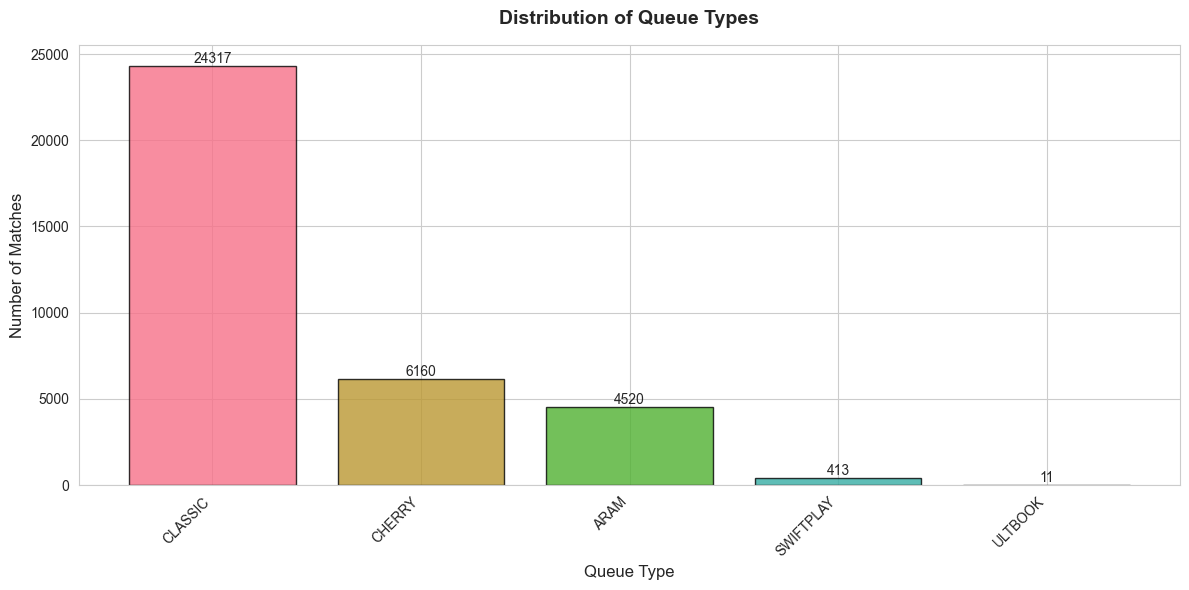

In [7]:
queue_counts = matchsdf['QueueType'].value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(queue_counts.index, queue_counts.values, color=sns.color_palette()[:len(queue_counts)], 
               alpha=0.8, edgecolor='black')
plt.bar_label(bars, fontsize=10)
plt.title('Distribution of Queue Types', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Queue Type', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Win rate for teams with dragon kills: 59.91%
Win rate for teams without dragon kills: 36.66%
Difference: 23.24%


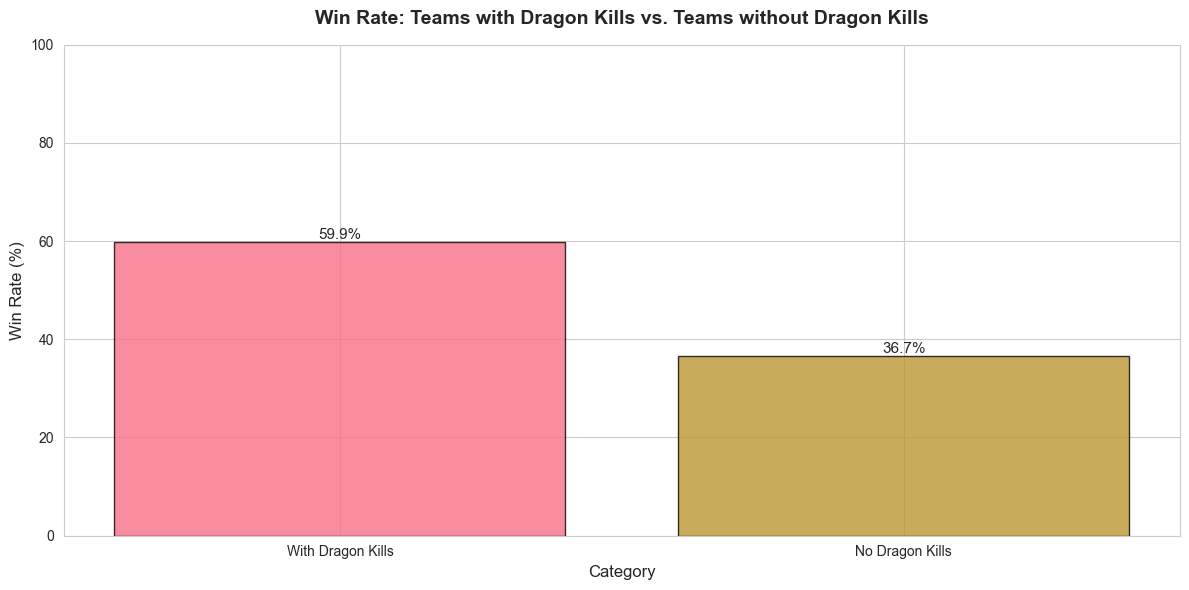

In [8]:
# Get TeamMatchTbl dataframe
teamdf = get_dataframe(data_frames, 'TeamMatchTbl')

# Calculate win rates for first dragon kill
blue_first_dragon = teamdf[teamdf['BlueDragonKills'] > 0]
red_first_dragon = teamdf[teamdf['RedDragonKills'] > 0]

# For teams that got at least one dragon, check if they won
blue_dragon_winrate = (blue_first_dragon['BlueWin'].sum() / len(blue_first_dragon)) * 100
red_dragon_winrate = (red_first_dragon['RedWin'].sum() / len(red_first_dragon)) * 100

# Calculate overall win rate for teams with no dragons
blue_no_dragon = teamdf[teamdf['BlueDragonKills'] == 0]
red_no_dragon = teamdf[teamdf['RedDragonKills'] == 0]

blue_no_dragon_winrate = (blue_no_dragon['BlueWin'].sum() / len(blue_no_dragon)) * 100 if len(blue_no_dragon) > 0 else 0
red_no_dragon_winrate = (red_no_dragon['RedWin'].sum() / len(red_no_dragon)) * 100 if len(red_no_dragon) > 0 else 0

# Average win rates
with_dragon_winrate = (blue_dragon_winrate + red_dragon_winrate) / 2
without_dragon_winrate = (blue_no_dragon_winrate + red_no_dragon_winrate) / 2

# Create visualization
plt.figure(figsize=(12, 6))
categories = ['With Dragon Kills', 'No Dragon Kills']
winrates = [with_dragon_winrate, without_dragon_winrate]
colors = [sns.color_palette()[0], sns.color_palette()[1]]

bars = plt.bar(categories, winrates, color=colors, alpha=0.8, edgecolor='black')
plt.bar_label(bars, fmt='%.1f%%', fontsize=11)
plt.title('Win Rate: Teams with Dragon Kills vs. Teams without Dragon Kills', fontsize=14, fontweight='bold', pad=15)
plt.ylabel('Win Rate (%)', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.ylim(0, 100)
plt.tight_layout()

print(f"Win rate for teams with dragon kills: {with_dragon_winrate:.2f}%")
print(f"Win rate for teams without dragon kills: {without_dragon_winrate:.2f}%")
print(f"Difference: {with_dragon_winrate - without_dragon_winrate:.2f}%")

plt.show()

Top 10 Champions by Win Rate (minimum 50 games):
 ChampionId ChampionName  Games  Wins   WinRate
         96       KogMaw   1708   927 54.274005
         24          Jax   3004  1593 53.029294
         78        Poppy   1801   954 52.970572
        133        Quinn   1343   711 52.941176
         19      Warwick   1619   853 52.686844
        134       Syndra   3115  1632 52.391653
        429      Kalista    754   395 52.387268
         92        Riven   1712   896 52.336449
         57       Maokai   1200   627 52.250000
        516         Ornn   1890   986 52.169312

Bottom 10 Champions by Win Rate (minimum 50 games):
 ChampionId ChampionName  Games  Wins   WinRate
        104       Graves   1314   630 47.945205
         91        Talon   2133  1020 47.819972
         42        Corki   1896   905 47.732068
          4  TwistedFate   1758   837 47.610922
        136  AurelionSol   1312   623 47.484756
        897       KSante   1897   897 47.285187
        101       Xerath   1779   

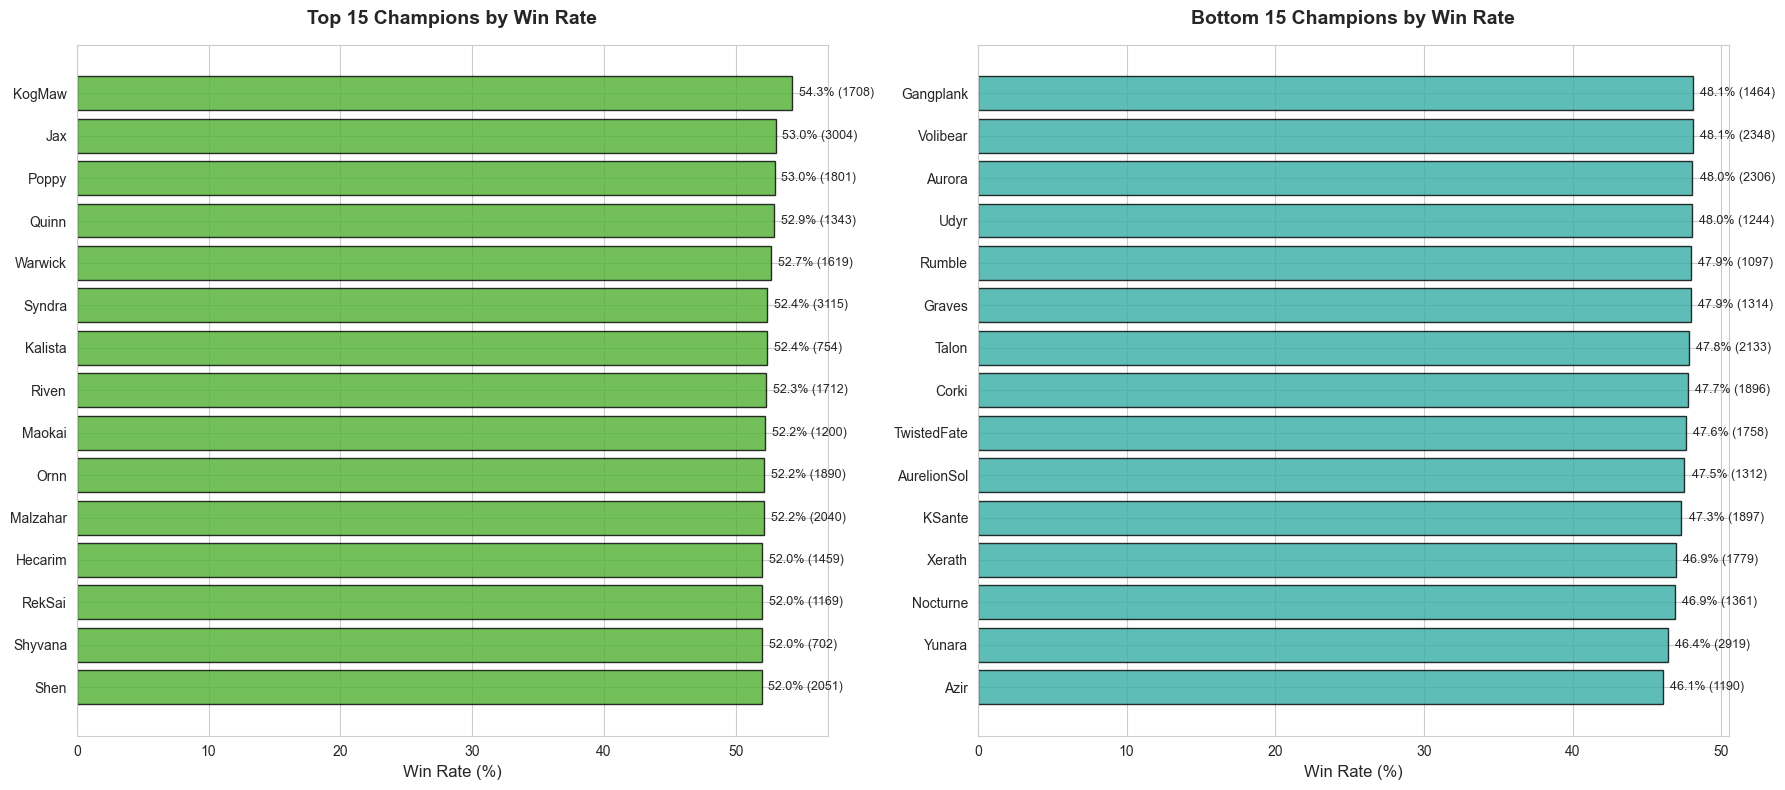


Overall Champion Statistics:
Total unique champions played: 171
Average win rate: 50.02%
Median win rate: 50.07%


In [9]:
# Analyze champion win rates from TeamMatchTbl
champion_df = get_dataframe(data_frames, 'ChampionTbl')

# Collect all champion appearances and wins
champion_stats = {}

# Process Blue side champions
for i in range(1, 6):
    champ_col = f'B{i}Champ'
    for idx, row in teamdf.iterrows():
        champ_id = row[champ_col]
        if champ_id not in champion_stats:
            champion_stats[champ_id] = {'games': 0, 'wins': 0}
        champion_stats[champ_id]['games'] += 1
        champion_stats[champ_id]['wins'] += row['BlueWin']

# Process Red side champions
for i in range(1, 6):
    champ_col = f'R{i}Champ'
    for idx, row in teamdf.iterrows():
        champ_id = row[champ_col]
        if champ_id not in champion_stats:
            champion_stats[champ_id] = {'games': 0, 'wins': 0}
        champion_stats[champ_id]['games'] += 1
        champion_stats[champ_id]['wins'] += row['RedWin']

# Create dataframe with champion statistics
champ_winrates = []
for champ_id, stats in champion_stats.items():
    if stats['games'] >= 50:  # Only include champions with at least 50 games
        winrate = (stats['wins'] / stats['games']) * 100
        champ_name = champion_df[champion_df['ChampionId'] == champ_id]['ChampionName'].values
        if len(champ_name) > 0:
            champ_winrates.append({
                'ChampionId': champ_id,
                'ChampionName': champ_name[0],
                'Games': stats['games'],
                'Wins': stats['wins'],
                'WinRate': winrate
            })

champ_winrates_df = pd.DataFrame(champ_winrates)
champ_winrates_df = champ_winrates_df.sort_values('WinRate', ascending=False)

# Display top 10 and bottom 10 champions by win rate
print("Top 10 Champions by Win Rate (minimum 50 games):")
print(champ_winrates_df.head(10).to_string(index=False))
print(f"\nBottom 10 Champions by Win Rate (minimum 50 games):")
print(champ_winrates_df.tail(10).to_string(index=False))

# Visualize top 15 and bottom 15 champions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Top 15 champions
top_15 = champ_winrates_df.head(15)
bars1 = ax1.barh(top_15['ChampionName'], top_15['WinRate'], color=sns.color_palette()[2], 
                 alpha=0.8, edgecolor='black')
ax1.set_xlabel('Win Rate (%)', fontsize=12)
ax1.set_title('Top 15 Champions by Win Rate', fontsize=14, fontweight='bold', pad=15)
ax1.invert_yaxis()
for i, (wr, games) in enumerate(zip(top_15['WinRate'], top_15['Games'])):
    ax1.text(wr + 0.5, i, f'{wr:.1f}% ({games})', va='center', fontsize=9)

# Bottom 15 champions
bottom_15 = champ_winrates_df.tail(15)
bars2 = ax2.barh(bottom_15['ChampionName'], bottom_15['WinRate'], color=sns.color_palette()[3], 
                 alpha=0.8, edgecolor='black')
ax2.set_xlabel('Win Rate (%)', fontsize=12)
ax2.set_title('Bottom 15 Champions by Win Rate', fontsize=14, fontweight='bold', pad=15)
ax2.invert_yaxis()
for i, (wr, games) in enumerate(zip(bottom_15['WinRate'], bottom_15['Games'])):
    ax2.text(wr + 0.5, i, f'{wr:.1f}% ({games})', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Overall statistics
print(f"\nOverall Champion Statistics:")
print(f"Total unique champions played: {len(champ_winrates_df)}")
print(f"Average win rate: {champ_winrates_df['WinRate'].mean():.2f}%")
print(f"Median win rate: {champ_winrates_df['WinRate'].median():.2f}%")

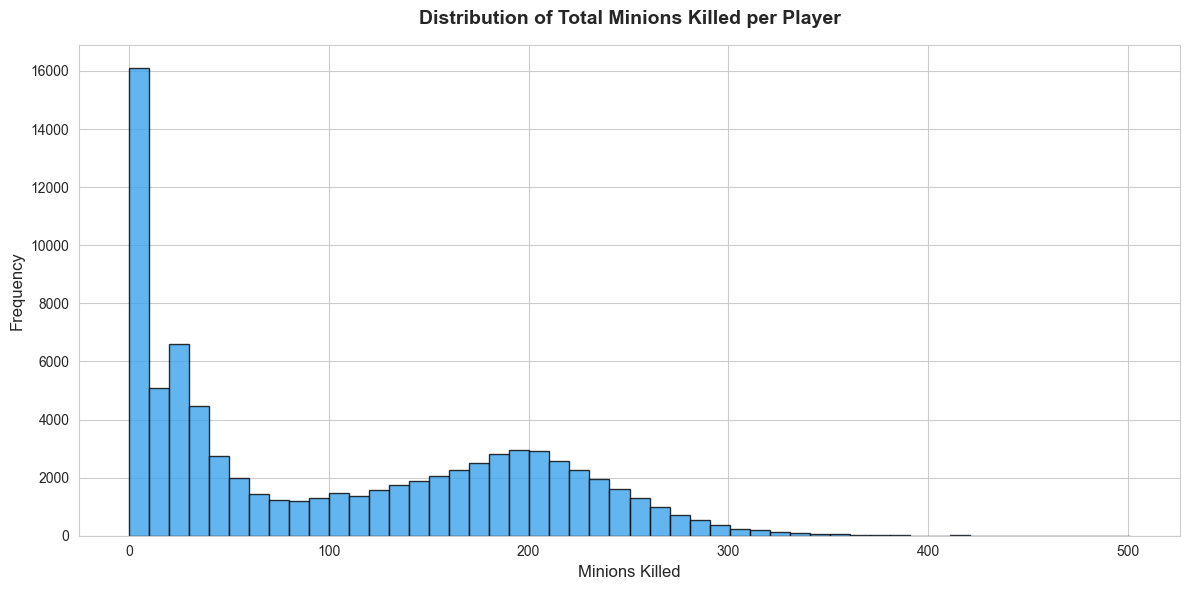

In [10]:
# Analyze Minions Killed from MatchStatsTbl
matchstatsdf = get_dataframe(data_frames, 'MatchStatsTbl') 
minions_killed = matchstatsdf['MinionsKilled']

plt.figure(figsize=(12, 6))
plt.hist(minions_killed, bins=50, color=sns.color_palette()[4], alpha=0.8, edgecolor='black')
plt.title('Distribution of Total Minions Killed per Player', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Minions Killed', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

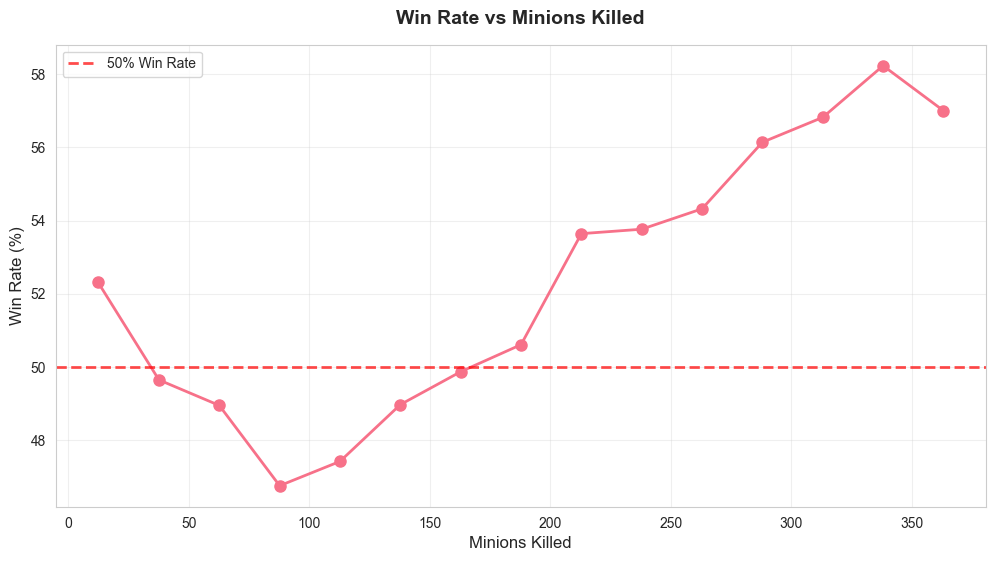

In [11]:
# Analyze win rate vs minions killed
# Group minions killed into bins and calculate win rate for each bin
matchstatsdf['MinionBin'] = pd.cut(matchstatsdf['MinionsKilled'], bins=20)
winrate_by_minions = matchstatsdf.groupby('MinionBin', observed=False).agg({
    'Win': ['mean', 'count']
}).reset_index()

# Flatten column names
winrate_by_minions.columns = ['MinionBin', 'WinRate', 'Count']
winrate_by_minions['WinRate'] = winrate_by_minions['WinRate'] * 100

# Get bin centers for plotting
winrate_by_minions['BinCenter'] = winrate_by_minions['MinionBin'].apply(lambda x: x.mid)

# Filter out bins with very few samples (less than 50)
winrate_by_minions_filtered = winrate_by_minions[winrate_by_minions['Count'] >= 50]

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 1: Win rate by minions killed
ax1.plot(winrate_by_minions_filtered['BinCenter'], winrate_by_minions_filtered['WinRate'], 
         marker='o', linewidth=2, markersize=8, color=sns.color_palette()[0])
ax1.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='50% Win Rate')
ax1.set_title('Win Rate vs Minions Killed', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Minions Killed', fontsize=12)
ax1.set_ylabel('Win Rate (%)', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Basic Statistical EDA

In [12]:
avgminionkilled = np.mean(matchstatsdf["MinionsKilled"])
avgdmgtaken = np.mean(matchstatsdf["DmgTaken"])
avgdmgdealt = np.mean(matchstatsdf["DmgDealt"])
avggold = np.mean(matchstatsdf["TotalGold"])
avgwins = np.mean(matchstatsdf["Win"])

print('Overall Average Statistics:')
print('='*50)
print(f"\nAverage Minions Killed: {avgminionkilled:.2f}")
print(f"Average Damage Taken: {avgdmgtaken:.2f}")
print(f"Average Damage Dealt: {avgdmgdealt:.2f}")
print(f"Average Gold: {avggold:.2f}")
print(f"Average Win Rate: {avgwins:.2%}")

Overall Average Statistics:

Average Minions Killed: 103.87
Average Damage Taken: 30430.42
Average Damage Dealt: 26311.80
Average Gold: 12350.63
Average Win Rate: 51.21%


In [13]:
# avg stat by lane
print('Average Statistics by Lane:')
print('='*80)

lanes = matchstatsdf['Lane'].unique()

for lane in lanes:
    lane_data = matchstatsdf[matchstatsdf['Lane'] == lane]
    
    if len(lane_data) > 0:
        avgminionkilled = np.mean(lane_data["MinionsKilled"])
        avgdmgtaken = np.mean(lane_data["DmgTaken"])
        avgdmgdealt = np.mean(lane_data["DmgDealt"])
        avggold = np.mean(lane_data["TotalGold"])
        avgwins = np.mean(lane_data["Win"])
        
        print(f"\n{lane} Lane (n={len(lane_data)}):")
        print('-'*50)
        print(f"  Average Minions Killed: {avgminionkilled:.2f}")
        print(f"  Average Damage Taken: {avgdmgtaken:.2f}")
        print(f"  Average Damage Dealt: {avgdmgdealt:.2f}")
        print(f"  Average Gold: {avggold:.2f}")
        print(f"  Average Win Rate: {avgwins:.2%}")

Average Statistics by Lane:

BOTTOM Lane (n=17540):
--------------------------------------------------
  Average Minions Killed: 123.79
  Average Damage Taken: 26980.32
  Average Damage Dealt: 26677.33
  Average Gold: 12724.17
  Average Win Rate: 53.29%

NONE Lane (n=10933):
--------------------------------------------------
  Average Minions Killed: 58.74
  Average Damage Taken: 15969.00
  Average Damage Dealt: 14355.19
  Average Gold: 7964.12
  Average Win Rate: 52.20%



TOP Lane (n=15953):
--------------------------------------------------
  Average Minions Killed: 140.57
  Average Damage Taken: 38859.11
  Average Damage Dealt: 33921.60
  Average Gold: 14337.99
  Average Win Rate: 57.09%

MIDDLE Lane (n=16287):
--------------------------------------------------
  Average Minions Killed: 134.62
  Average Damage Taken: 29118.85
  Average Damage Dealt: 28274.13
  Average Gold: 12746.35
  Average Win Rate: 43.16%

SUPPORT Lane (n=6275):
--------------------------------------------------
  Average Minions Killed: 18.98
  Average Damage Taken: 31721.92
  Average Damage Dealt: 25988.94
  Average Gold: 11691.46
  Average Win Rate: 57.82%

JUNGLE Lane (n=11875):
--------------------------------------------------
  Average Minions Killed: 69.35
  Average Damage Taken: 38633.85
  Average Damage Dealt: 24036.16
  Average Gold: 12973.17
  Average Win Rate: 46.86%


In [14]:
# Analyze win rate by first item
print('Win Rate by First Item:')
print('='*80)

firstitem = matchstatsdf['item1'].unique()
itemdf = get_dataframe(data_frames, 'ItemTbl')

# Collect item statistics
item_stats = []

for i in firstitem:
    item_data = matchstatsdf[matchstatsdf['item1'] == i]
    
    if len(item_data) >= 100:  # Only include items with at least 100 games
        avgwins = np.mean(item_data["Win"])
        
        # Get item name, handle missing items
        item_name_result = itemdf[itemdf['ItemID'] == i]['ItemName'].values
        if len(item_name_result) > 0:
            item_name = item_name_result[0]
        else:
            item_name = f"Unknown Item"
        
        item_stats.append({
            'ItemID': i,
            'ItemName': item_name,
            'Games': len(item_data),
            'WinRate': avgwins * 100
        })


item_stats_df = pd.DataFrame(item_stats)
item_stats_df = item_stats_df.sort_values('WinRate', ascending=False)

print(f"\nTop 10 First Items by Win Rate (minimum 100 games):")
print(item_stats_df.head(10))

print(f"\nBottom 10 First Items by Win Rate (minimum 100 games):")
print(item_stats_df.tail(10))

Win Rate by First Item:

Top 10 First Items by Win Rate (minimum 100 games):
     ItemID                  ItemName  Games    WinRate
82   223165            Morellonomicon    111  85.585586
78   223089        Rabadon's Deathcap    321  81.308411
91   223072             Bloodthirster    105  80.952381
150    3172          Gunmetal Greaves    167  80.838323
154    3041       Mejai's Soulstealer    179  80.446927
75   224645               Shadowflame    115  79.130435
70     3175      Spellslinger's Shoes    265  75.094340
156  223153  Blade of The Ruined King    116  74.137931
31     3171          Crimson Lucidity    365  72.328767
73     3173       Chainlaced Crushers    275  71.636364

Bottom 10 First Items by Win Rate (minimum 100 games):
     ItemID           ItemName  Games    WinRate
28     1101     Scorchclaw Pup    181  33.701657
47   223111   Mercury's Treads    350  33.428571
115    1028       Ruby Crystal    109  30.275229
79     2050  Guardian's Shroud    325  16.923077
46   2

This accounts for all game modes

IndexError: index 0 is out of bounds for axis 0 with size 0

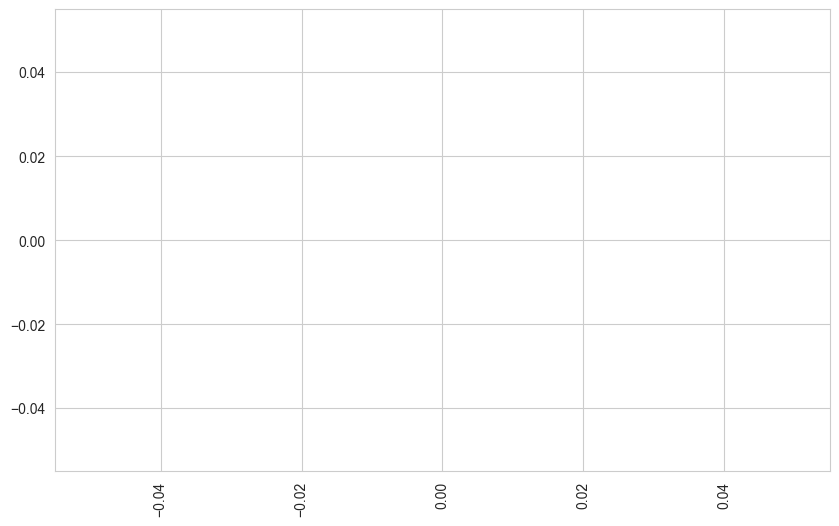

In [ ]:
# Analyze rank distribution
rankdf = get_dataframe(data_frames, 'RankTbl')
rank_dict = dict(zip(rankdf['RankId'], rankdf['RankName']))

# Map rank IDs to rank names
matchsdf["RankName"] = matchsdf["RankFk"].map(rank_dict)

# Get rank counts and sort by the original order in RankTbl
rank_counts = matchsdf["RankName"].value_counts()

# Create visualization with consistent styling
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(rank_counts)), rank_counts.values, 
               color=sns.color_palette()[0], alpha=0.8, edgecolor='black')
plt.bar_label(bars, fontsize=10)
plt.xticks(range(len(rank_counts)), rank_counts.index, rotation=45, ha='right')
plt.title("Distribution of Ranks", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Rank", fontsize=12)
plt.ylabel("Number of Matches", fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nRank Distribution Summary:")
print(rank_counts)